#Overview

In this lab, we will introduce Open-World Visual Recognition, focusing on the ability of AI systems to identify unseen objects and concepts. It explores CLIP (Contrastive Language-Image Pretraining), an OpenAI model that aligns images and text in a shared space, enabling zero-shot learning and open-ended understanding.

You will learn the basics of open-world recognition, how CLIP works, and its applications in tasks like semantic search and image classification. The class includes practical examples and discussions on CLIP's future potential, providing a concise yet comprehensive introduction to this emerging field.

#Background

Traditional computer vision systems are designed for closed-set recognition, where models are trained to classify images into a fixed set of predefined categories. While effective in controlled environments, these systems struggle in real-world scenarios where they encounter objects or concepts outside their training data. This limitation has led to the development of Open-World Visual Recognition, which focuses on building systems that can generalize to unseen categories by leveraging contextual knowledge or external information.

A breakthrough in this field is OpenAI’s CLIP (Contrastive Language–Image Pretraining). CLIP addresses open-world challenges by training on a massive dataset of image-text pairs, aligning visual and textual representations in a shared embedding space. Unlike traditional models, CLIP understands images in the context of natural language, enabling it to perform tasks like zero-shot classification, semantic similarity search, and visual grounding without task-specific fine-tuning. Its ability to generalize across diverse domains has made it a cornerstone for advancing open-world recognition and multi-modal AI systems.

CLIP represents a paradigm shift, bridging vision and language to enable more adaptable, real-world AI applications. This class builds on this background to explore its principles, applications, and implications.

#CLIP

CLIP (Contrastive Language-Image Pretraining), developed by OpenAI, is a prominent model enabling open-world visual recognition. It aligns images and text in a shared embedding space through large-scale training on diverse image-text pairs. CLIP can recognize and relate images to textual descriptions without task-specific fine-tuning, making it highly effective for zero-shot learning, semantic search, and open-ended visual understanding. Its versatility has made it a cornerstone in advancing generalized AI for vision and language tasks.

CLIP trained on a wide variety of images with a wide variety of natural language supervision that's abundantly available on the internet. By design, the network can be instructed in natural language to perform a great variety of classification benchmarks, without directly optimizing for the benchmark's performance, similar to the "zero-shot(opens in a new window)" capabilities of GPT-2 and GPT-3. This is a key change: by not directly optimizing for the benchmark, we show that it becomes much more representative: our system closes this "robustness gap" by up to 75% while matching the performance of the original ResNet-50 on ImageNet(opens in a new window) zero-shot without using any of the original 1.28M labeled examples.

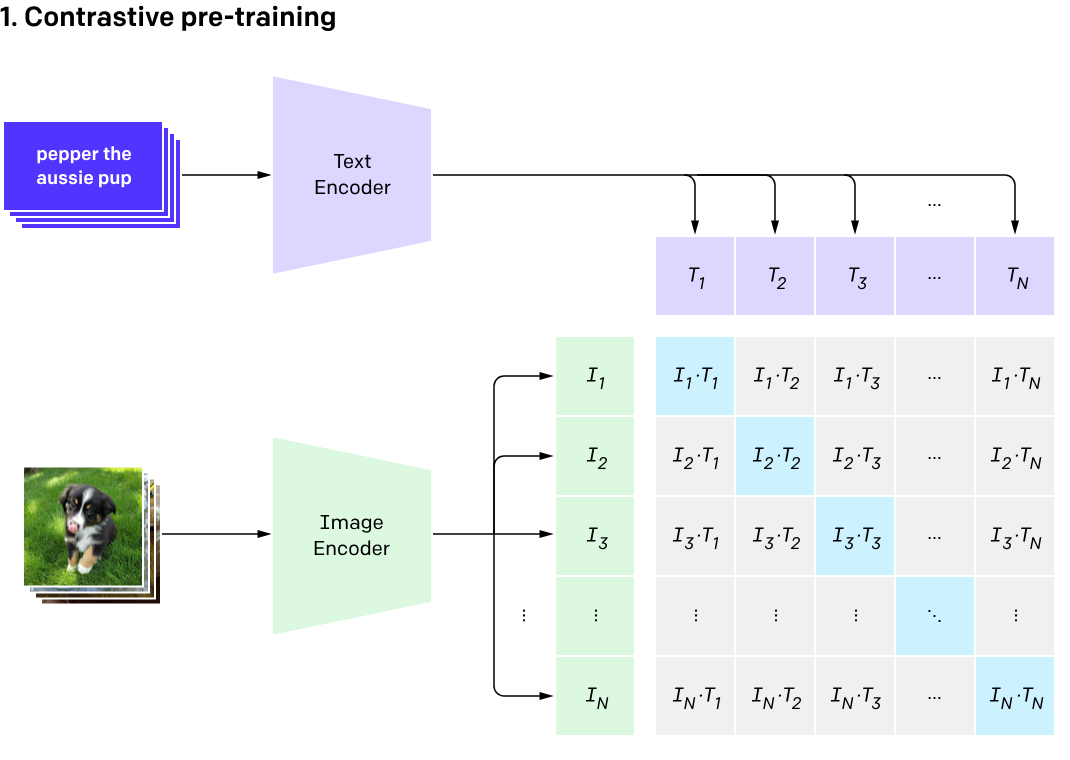

CLIP achieves Open-World Visual Recognition by aligning images and text in a shared embedding space using a contrastive learning approach. It is trained on a large dataset of image-text pairs, optimizing the model to associate an image with its corresponding text description and distinguish it from unrelated ones.

Key methods include:

* Text and Image Embeddings: CLIP uses two separate neural networks: a vision encoder (e.g., ResNet or ViT) for images and a language encoder (e.g., Transformer) for text. These encoders map inputs into vector representations in the same space.
* Cosine Similarity: The similarity between image and text embeddings is computed using cosine similarity, enabling the model to predict which text best describes an image or vice versa.
* Zero-Shot Learning: By comparing an image’s embedding to embeddings of text prompts (e.g., "a photo of a dog", "a photo of a car"), CLIP can classify images without task-specific training.
* Prompt Engineering: Carefully crafted text prompts enhance recognition accuracy by providing context to the model.

These techniques allow CLIP to generalize to unseen categories, making it a powerful tool for open-world recognition tasks.

#Objectives

* Understand the concept and importance of Open-World Visual Recognition.
* Learn how the CLIP model works, including its use of contrastive learning.
* Explore how CLIP utilizes text prompts and cosine similarity to achieve generalization.
* Gain insight into real-world applications of CLIP across diverse domains.
* Learn to apply CLIP for practical open-world recognition tasks.

#Case Study

##Preparation

In [ ]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

## Loading the model

`clip.available_models()` will list the names of available CLIP models. We will use ResNet50 (RN50) in this lab.

In [ ]:
import clip
import numpy as np
import torch
from pkg_resources import packaging

clip.available_models()

In [ ]:
model, preprocess = clip.load("RN50")
model.cuda().eval()
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

## Image Preprocessing

We resize the input images and center-crop them to conform with the image resolution that the model expects. Before doing so, we will normalize the pixel intensity using the dataset mean and standard deviation.

The second return value from `clip.load()` contains a torchvision `Transform` that performs this preprocessing.



In [ ]:
preprocess

## Setting up input images and texts

We are going to feed 8 example images and their textual descriptions to the model, and compare the similarity between the corresponding features.

The tokenizer is case-insensitive, and we can freely give any suitable textual descriptions.

In [ ]:
import os
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from collections import OrderedDict
import torch

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

descriptions = {
    "page": "a page of text about segmentation",
    "chelsea": "a facial photo of a tabby cat",
    "astronaut": "a portrait of an astronaut with the American flag",
    "rocket": "a rocket standing on a launchpad",
    "clock": "A fuzzy clock in motion",
    "camera": "a person looking at a camera on a tripod",
    "horse": "a black-and-white silhouette of a horse",
    "coffee": "a cup of coffee on a saucer"
}

In [ ]:
original_images = []
images = []
texts = []
plt.figure(figsize=(10, 10))

for name, description in descriptions.items():
    try:
        if hasattr(skimage.data, name):
            image = getattr(skimage.data, name)()
        else:
            print(f"{name} is not available in skimage.data.")
    except Exception as e:
        print(f"Error loading {name}: {e}")
    if isinstance(image, np.ndarray):
      image = Image.fromarray(image).convert("RGB")
    else:
      image = image.convert("RGB")
    plt.subplot(4, 2, len(images) + 1)
    plt.imshow(image)
    plt.title(f"{name} - {descriptions[name]}")
    plt.xticks([])
    plt.yticks([])

    original_images.append(image)
    images.append(preprocess(image))
    texts.append(descriptions[name])

plt.tight_layout()


## Calculate the probs with CLIP Model

After preprocessing the image and text inputs, we can directly pass them into the CLIP model to obtain similarity logits.

**Use `logits_per_image` to calculate the text probability distribution for each image (using the softmax function).**

In [ ]:
image_input = torch.tensor(np.stack(images)).cuda()
text_tokens = clip.tokenize(["This is " + desc for desc in texts]).cuda()
with torch.no_grad():
  logits_per_image, logits_per_text = model(image_input, text_tokens)

  ########################################################
  # TODO: Please calculate the probs of logits_per_image
  ########################################################

  print(probs)

Visualize the probs.

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_images[4])
plt.axis('off')
plt.title('Selected Image')

plt.subplot(1, 2, 2)
bars = plt.barh(range(len(texts)), probs[4], color='skyblue')
plt.yticks(range(len(texts)), texts)
plt.xlabel('Similarity Probability')
plt.title('Image-Text Similarity')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}',
             va='center', ha='left', color='black')

plt.tight_layout()
plt.show()

## Building features and calculating cosine similarity

In addition to directly passing the data into the model to compute similarity, we can also use the model's encoder to separately extract features from images and text and manually calculate the cosine similarity.

###Features Extraction

We preprocess the images, tokenize each text input, and run the forward pass of the model to get the image and text features.

In [ ]:
with torch.no_grad():
    image_features = model.encode_image(image_input).float()
    text_features = model.encode_text(text_tokens).float()

### Calculating cosine similarity

Cosine Similarity measures the similarity between two vectors based on the cosine of the angle between them, ranging from -1 to 1. A value of 1 indicates identical direction, while 0 indicates orthogonality.

To calculate the cosine similarity, both image and text features need to be  normalized first. Then, cosine similarity is computed using the dot product:

In [ ]:
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)

#############################################################################################################################
# TODO: Calculate the cosine similarity using the matrix multiplication.
# Notice: Pay attention to the direction of the dot product. You need to calculate the similarity of each text to the image.
#############################################################################################################################

print(similarity)

Visualize the similarity matrix.

In [ ]:
count = len(descriptions)

similarity = similarity.cpu().numpy()
plt.figure(figsize=(15, 9))
plt.imshow(similarity, vmin=0.1, vmax=0.3)
plt.yticks(range(count), texts, fontsize=18)
plt.xticks([])
for i, image in enumerate(original_images):
    plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

for side in ["left", "top", "right", "bottom"]:
  plt.gca().spines[side].set_visible(False)

plt.xlim([-0.5, count - 0.5])
plt.ylim([count + 0.5, -2])

plt.title("Cosine similarity between text and image features", size=20)

## Zero-Shot Image Classification



Using this method of text similarity calculation to achieve classification, we can give any new category for classification, thereby achieving zero-shot classification. Here we try to classify the same image using cifar100 categories.

In [ ]:
import os
from torchvision.datasets import CIFAR100
from torch.utils.data import DataLoader

cifar100 = CIFAR100(os.path.expanduser("~/.cache"), transform=preprocess, download=True)
data_loader = DataLoader(cifar100, batch_size=32, shuffle=False, num_workers=2)

In [ ]:
text_descriptions = [f"This is a photo of a {label}" for label in cifar100.classes]

########################################################
 # TODO: Extract the text feature of cifar label.
########################################################

cifar_text_features = ...

def calculate_probs(image_features, text_features):
  ########################################################################################################################################################################
  # TODO: Complete this function to calculate the cosine similarity between image and text features, and then apply the softmax function to obtain the probabilities.
  # Notice: You should multiply by 100 for similarity before applying the softmax function.
  ########################################################################################################################################################################
  return text_probs


In [ ]:
text_probs = calculate_probs(image_features, cifar_text_features)

top_probs, top_labels = text_probs.cpu().topk(5, dim=-1)

plt.figure(figsize=(16, 16))

for i, image in enumerate(original_images):
    plt.subplot(4, 4, 2 * i + 1)
    plt.imshow(image)
    plt.axis("off")

    plt.subplot(4, 4, 2 * i + 2)
    y = np.arange(top_probs.shape[-1])
    plt.grid()
    plt.barh(y, top_probs[i])
    plt.gca().invert_yaxis()
    plt.gca().set_axisbelow(True)
    plt.yticks(y, [cifar100.classes[index] for index in top_labels[i].numpy()])
    plt.xlabel("probability")

plt.subplots_adjust(wspace=0.5)
plt.show()

Similarly, for any classification task dataset, we can directly use CLIP to implement zero-shot performance evaluation. Here we test the EuroSAT dataset.

Visualize the dataset and change a dataset for exercise.

In [ ]:
import os
from tqdm import tqdm
from torchvision.datasets import EuroSAT
from torch.utils.data import DataLoader

eurosat = EuroSAT(os.path.expanduser("~/.cache"), transform=preprocess, download=True)
data_loader = DataLoader(eurosat, batch_size=32, shuffle=False, num_workers=2)

###Visualize the data

The EuroSAT dataset is a publicly available remote sensing dataset based on Sentinel-2 satellite images, covering 13 spectral bands. It includes 27,000 labeled and geo-referenced images across ten land cover classes such as forests, residential areas, and rivers. The dataset is widely used for land use and land cover classification tasks and serves as a benchmark for machine learning and deep learning models.

Let's visualize some data to get a better understanding.

In [ ]:
import random
import matplotlib.pyplot as plt
from torchvision.transforms import Normalize

categories = eurosat.classes
print(categories)

images_per_category = {category: None for category in categories}

for img, label in eurosat:
    category = categories[label]
    if images_per_category[category] is None:
        images_per_category[category] = img

    if None not in images_per_category.values():
        break

fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes = axes.flatten()

for transform in preprocess.transforms:
    if isinstance(transform, Normalize):
        mean = transform.mean
        std = transform.std
        break

for idx, (category, img) in enumerate(images_per_category.items()):
    if img is not None:
        img = img * torch.tensor(std).view(3, 1, 1).to(img.device)
        img = img + torch.tensor(mean).view(3, 1, 1).to(img.device)
        img = img.clamp(0, 1)

        img = img.permute(1, 2, 0)

        axes[idx].imshow(img.numpy())
        axes[idx].set_title(category)
        axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
text_descriptions = [f"This is a photo of a {label}" for label in eurosat.classes]

In [ ]:
def ZeroShot_Eval(text_descriptions):
  text_tokens = clip.tokenize(text_descriptions).cuda()
  correct = 0
  total = 0
  with torch.no_grad():
    text_features = model.encode_text(text_tokens).float()
    text_features /= text_features.norm(dim=-1, keepdim=True)
    for image_input, label in tqdm(data_loader, desc="Loading Data", total=len(data_loader)):
      image_input = image_input.cuda()
      image_features = model.encode_image(image_input).float()

      text_probs = calculate_probs(image_features, text_features)
      top_labels = text_probs.argmax(dim=-1).cpu()
      correct += (top_labels == label).sum().item()
      total += label.size(0)

  accuracy = correct / total
  print(f"\nOverall Accuracy: {accuracy:.4f}")

In [ ]:
ZeroShot_Eval(text_descriptions)

##Prompt engineering

In text image processing such as the CLIP model, we treat input on the text side as prompt. Prompt engineering is the process of crafting and optimizing input prompts to guide models.

Next, we will change the input prompt to visually observe the effect of the prompt.

Here we change the original prompt `"This is a photo of a {label}"` to `"A photo of a {label}"`.

In [ ]:
text_descriptions = [f"A photo of a {label}" for label in eurosat.classes]
ZeroShot_Eval(text_descriptions)

It can be seen that a small change in the prompt will affect the results, so a reasonable prompt design will be more conducive to the performance of the model.

Now you can try designing a prompt yourself manually to see the changes and effects.

In [ ]:
########################################################
# TODO: Designe a prompt.
########################################################
manual_descriptions = ["YOUR PROMPT"]
ZeroShot_Eval(manual_descriptions)

## Prompt Ensembling

To mitigate the effects of varying prompts, the prompt ensembling method is proposed. This approach involves combining multiple prompts or their variations to enhance the performance and robustness of the model's outputs.

In [ ]:
prompt_template=[
    'a bad photo of a {}.',
    'a photo of many {}.',
    'a sculpture of a {}.',
    'a photo of the hard to see {}.',
    'a low resolution photo of the {}.',
    'a rendering of a {}.',
    'graffiti of a {}.',
    'a bad photo of the {}.',
    'a cropped photo of the {}.',
    'a tattoo of a {}.',
    'the embroidered {}.',
    'a photo of a hard to see {}.',
    'a bright photo of a {}.',
    'a photo of a clean {}.',
    'a photo of a dirty {}.',
    'a dark photo of the {}.',
    'a drawing of a {}.',
    'a photo of my {}.',
    'the plastic {}.',
    'a photo of the cool {}.',
    'a close-up photo of a {}.',
    'a black and white photo of the {}.',
    'a painting of the {}.',
    'a painting of a {}.',
    'a pixelated photo of the {}.',
    'a sculpture of the {}.',
    'a bright photo of the {}.',
    'a cropped photo of a {}.',
    'a plastic {}.',
    'a photo of the dirty {}.',
    'a jpeg corrupted photo of a {}.',
    'a blurry photo of the {}.',
    'a photo of the {}.',
    'a good photo of the {}.',
    'a rendering of the {}.',
    'a {} in a video game.',
    'a photo of one {}.',
    'a doodle of a {}.',
    'a close-up photo of the {}.',
    'a photo of a {}.',
    'the origami {}.',
    'the {} in a video game.',
    'a sketch of a {}.',
    'a doodle of the {}.',
    'a origami {}.',
    'a low resolution photo of a {}.',
    'the toy {}.',
    'a rendition of the {}.',
    'a photo of the clean {}.',
    'a photo of a large {}.',
    'a rendition of a {}.',
    'a photo of a nice {}.',
    'a photo of a weird {}.',
    'a blurry photo of a {}.',
    'a cartoon {}.',
    'art of a {}.',
    'a sketch of the {}.',
    'a embroidered {}.',
    'a pixelated photo of a {}.',
    'itap of the {}.',
    'a jpeg corrupted photo of the {}.',
    'a good photo of a {}.',
    'a plushie {}.',
    'a photo of the nice {}.',
    'a photo of the small {}.',
    'a photo of the weird {}.',
    'the cartoon {}.',
    'art of the {}.',
    'a drawing of the {}.',
    'a photo of the large {}.',
    'a black and white photo of a {}.',
    'the plushie {}.',
    'a dark photo of a {}.',
    'itap of a {}.',
    'graffiti of the {}.',
    'a toy {}.',
    'itap of my {}.',
    'a photo of a cool {}.',
    'a photo of a small {}.',
    'a tattoo of the {}.',
]

In [ ]:
########################################################################################################################################################################
# TODO: Create the ensemble text description. In other words, each class should formulate the description by incorporating all the prompts provided in the template.
########################################################################################################################################################################
correct = 0
total = 0
with torch.no_grad():
  # Extract text features and compute the average values for each prompt across all classes. The final text feature for each class is determined by the average of all prompt templates.
  text_features =
  for image_input, label in tqdm(data_loader, desc="Loading Data", total=len(data_loader)):
    image_input = image_input.cuda()
    image_features = model.encode_image(image_input).float()

    text_probs = calculate_probs(image_features, text_features)
    top_labels = text_probs.argmax(dim=-1).cpu()
    correct += (top_labels == label).sum().item()
    total += label.size(0)

accuracy = correct / total
print(f"\nOverall Accuracy: {accuracy:.4f}")

#Exercise

Now that you have learned about the capabilities of the CLIP model, you can leverage its abilities to perform zero-shot classification on any new dataset. Now, try using the [**Flowers102**](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/) dataset to independently explore the application of CLIP.

### Instructions

* Load the flowers102 Dataset. You can use [torchvision.datasets](https://pytorch.org/vision/main/generated/torchvision.datasets.Flowers102.html).
* Visulize the dataset.
* Complete zero-shot classification with CLIP.
* Change the Prompt for testing.
* Apply the prompt ensembling technique.